In [2]:
%matplotlib inline
import urllib
import urllib2
import json

data = {'sql': """SELECT to_char(day, 'YYYYmmdd') as d, snowd from alldata_ia where station = 'IA2203' and
        (month = 11 or sday = '1225')"""}
url = "https://mesonet.agron.iastate.edu/api/sql/database/coop?%s" % (urllib.urlencode(data),)

jdata = json.load( urllib2.urlopen(url) )

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = {}
for row in jdata['results']:
    data[ row['d'] ] = row['snowd']

In [6]:
import mx.DateTime
iChristmas = 0
iTurkey = 0
iBoth = 0
years = 0
for yr in range(1893,2013):
    years += 1
    nov1 = mx.DateTime.DateTime(yr, 11, 1)
    turkey = nov1 + mx.DateTime.RelativeDateTime(weekday=(mx.DateTime.Thursday,4))
    thanksgiving = data[turkey.strftime("%Y%m%d")]
    christmas = data['%s1225' % (yr,)]
    if christmas > 0:
        iChristmas += 1
    if thanksgiving > 0:
        iTurkey += 1
    if thanksgiving > 0 and christmas > 0:
        iBoth += 1

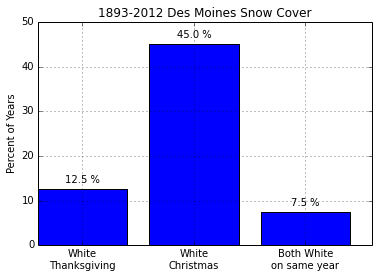

In [18]:
import matplotlib.pyplot as plt

(fig, ax) = plt.subplots(1,1)

ax.set_title("1893-2012 Des Moines Snow Cover")
ax.set_ylabel("Percent of Years")
bars = ax.bar([1,2,3], [iTurkey/float(years)*100., iChristmas/float(years)*100.,iBoth/float(years)*100.])

for bar in bars:
    ax.text(bar.get_x() + 0.4, bar.get_height()+1.4, '%.1f %%' % (bar.get_height(),), ha='center') 

ax.set_ylim(top=50)
ax.grid(True)
ax.set_xticks([1.4, 2.4, 3.4])
ax.set_xticklabels(['White\nThanksgiving', 'White\nChristmas', 'Both White\non same year'])


In [19]:
fig.savefig('test.png')

/usr/lib64/python2.6/site-packages/matplotlib/__init__.py:1141: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
